In [87]:

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import os
import math
import numpy as np
import torch as t
import torch.utils.data as tdata
import matplotlib.pyplot as plt
from einops import rearrange
from dots.training import *
from dots.trainhooks import *
from dots.models import MLP
from dots.dots import *
from dots.utils import *
from dots.plotting import *
from dots.datasets import *
from dots.experiment import get_train_state, get_config_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
good_cnn = load_model("easy-sweep-7")
good_cnn

BasicCNN(
  (layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=200, out_features=10, bias=True)
)

In [5]:
mnist = get_dataset("mnist")

In [6]:
len(mnist)

60000

In [7]:
accuracy(good_cnn, mnist)

tensor(0.9805)

In [8]:
ts = get_train_state("../configs/models/cnn-mnist-good.yml")
ts.model.count_params()

2346

In [9]:
batch, y = x_y_tensors_of_dataset(mnist, range(100))
batch.shape

torch.Size([100, 1, 28, 28])

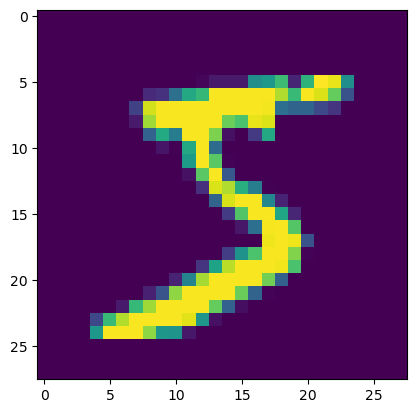

In [10]:
plt.imshow(batch[0, 0])

In [11]:
y

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [12]:
ts.model.jacobian(batch).shape

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


torch.Size([100, 10, 2346])

In [13]:
jac = ts.model.matrix_jacobian(batch)
jac.shape

torch.Size([1000, 2346])

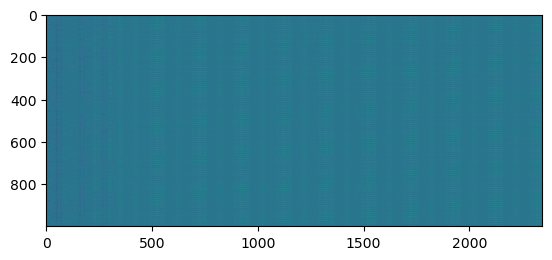

In [14]:
plt.imshow(jac.detach().numpy())

## Start of training

### With bias

In [15]:
batch.shape

torch.Size([100, 1, 28, 28])

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:276: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


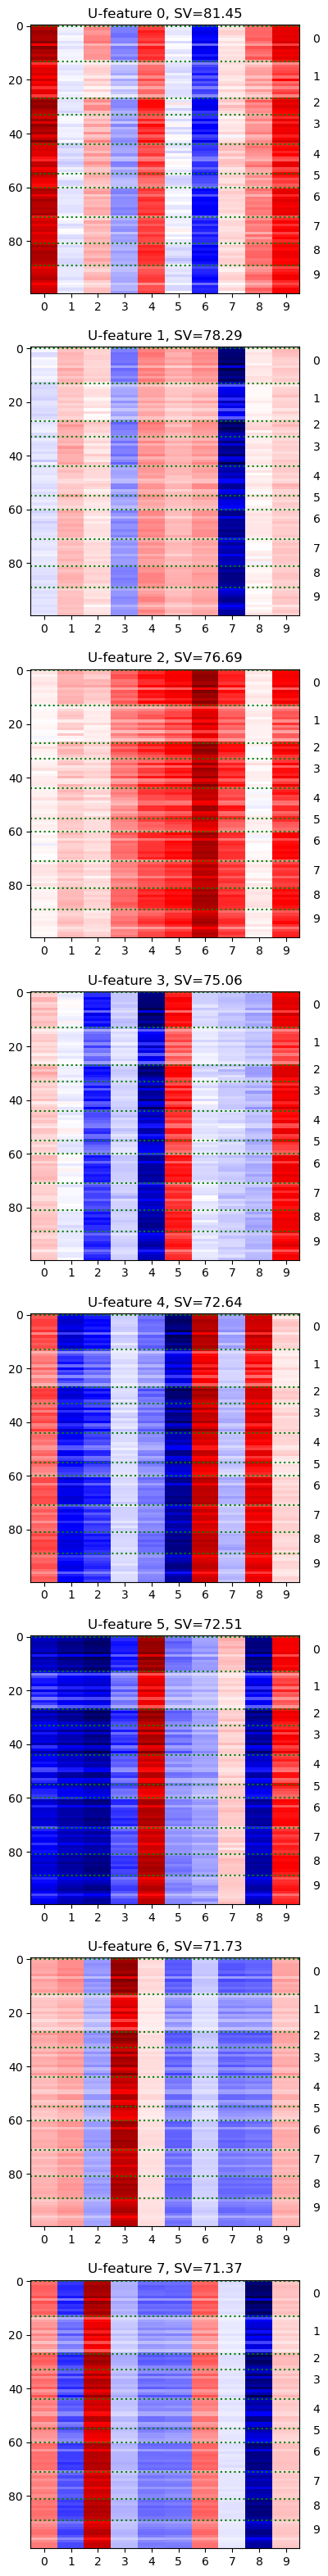

In [16]:
plot_top_2d_u_feats(ts.model, batch, y, max_feats=8, figsize=(20, 40))

### Without bias

In [17]:
from dots.models import *

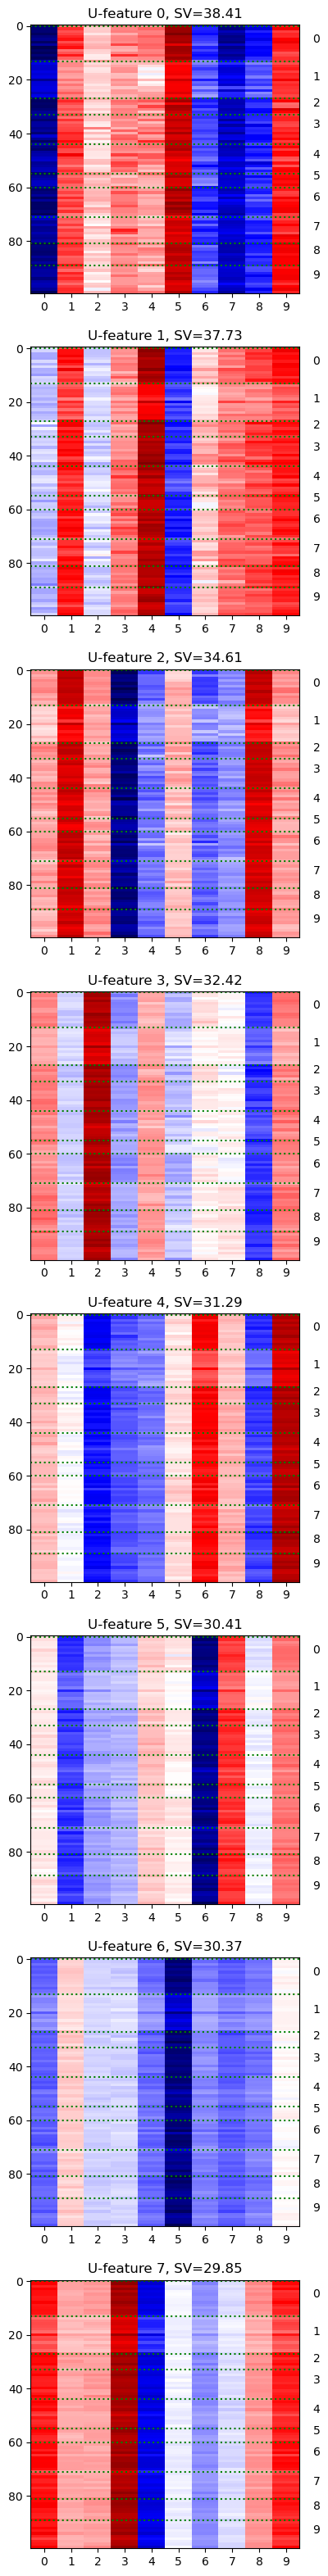

In [18]:
plot_top_2d_u_feats(
    BasicCNN(fc_bias=False),
    batch, 
    y, 
    max_feats=8, 
    figsize=(20, 40)
)

## After training on good MNIST classifier

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:276: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


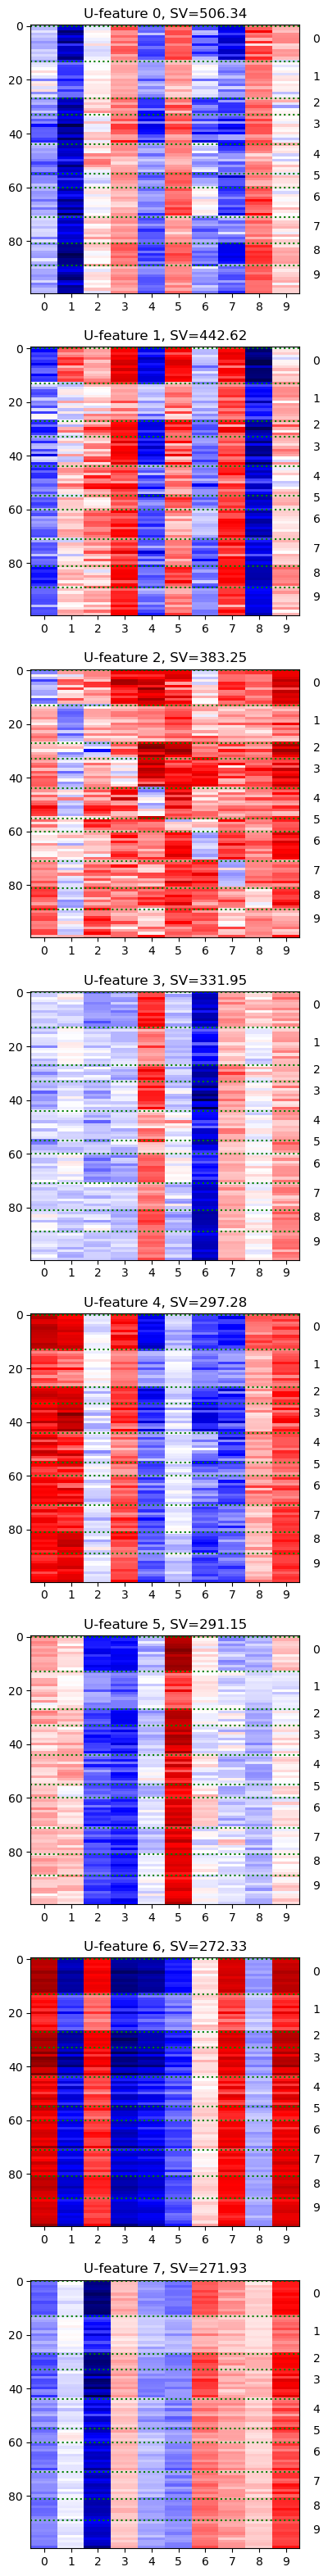

In [34]:
plot_top_2d_u_feats(good_cnn, batch, y, max_feats=8, figsize=(20, 40))

In [35]:
good_cnns = [
    "vibrant-sweep-30",
    "twilight-sweep-4", # high acc, low data DOTS
#    "curious-sweep-13" # high acc, low data+rand DOTS -- LOST TO TIME!!! :( :( :(
    "scarlet-sweep-8",
    "cerulean-sweep-7",
    "glamorous-sweep-16"
]

for name in good_cnns:
    load_model(name, loc="models2")

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:276: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


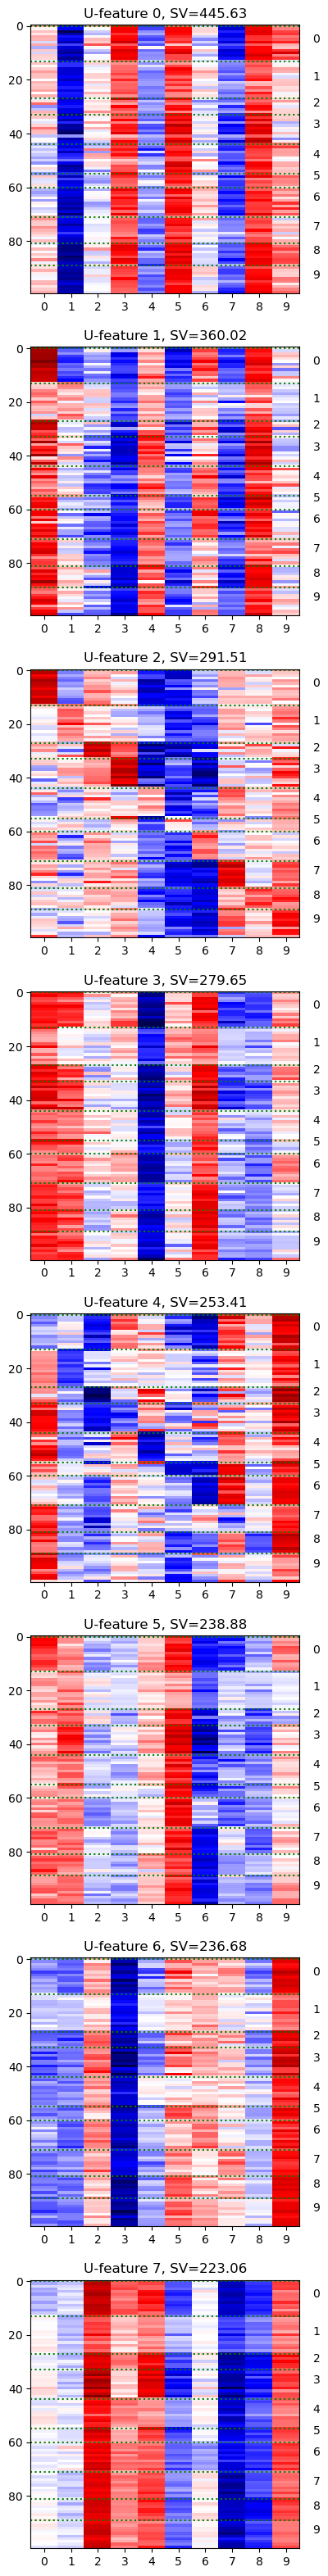

In [30]:
cnn = load_model(good_cnns[0], loc="models2")
plot_top_2d_u_feats(cnn, batch, y, max_feats=8, figsize=(20, 40))

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:276: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


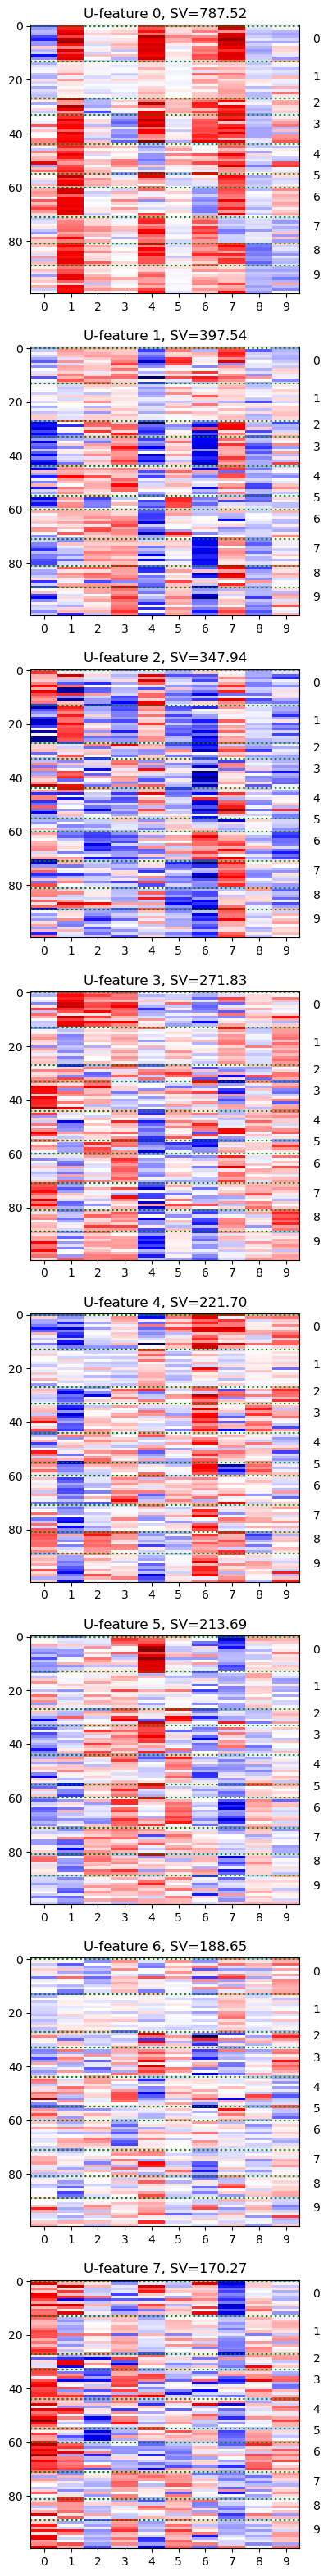

In [29]:
cnn = load_model(good_cnns[1], loc="models2")
plot_top_2d_u_feats(cnn, batch, y, max_feats=8, figsize=(20, 40))

# CNNs without bias - do they have vertical stripes?

In [39]:
nobias_cnns_good = [
    "eager-sweep-16",
    "flowing-sweep-15",
    "polar-sweep-13",
    "warm-sweep-11",
    "fiery-sweep-10",
    "restful-sweep-3"
]
for name in nobias_cnns_good:
    load_model(name, loc="models2")

In [40]:
good_cnns

['vibrant-sweep-30',
 'twilight-sweep-4',
 'scarlet-sweep-8',
 'cerulean-sweep-7',
 'glamorous-sweep-16']

In [90]:
models_no_bias = [load_model(name, loc="models2") for name in nobias_cnns_good]

models_w_bias = [load_model(name, loc="models2") for name in good_cnns]

## Visualisation

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:372: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  "SV (entropy)",


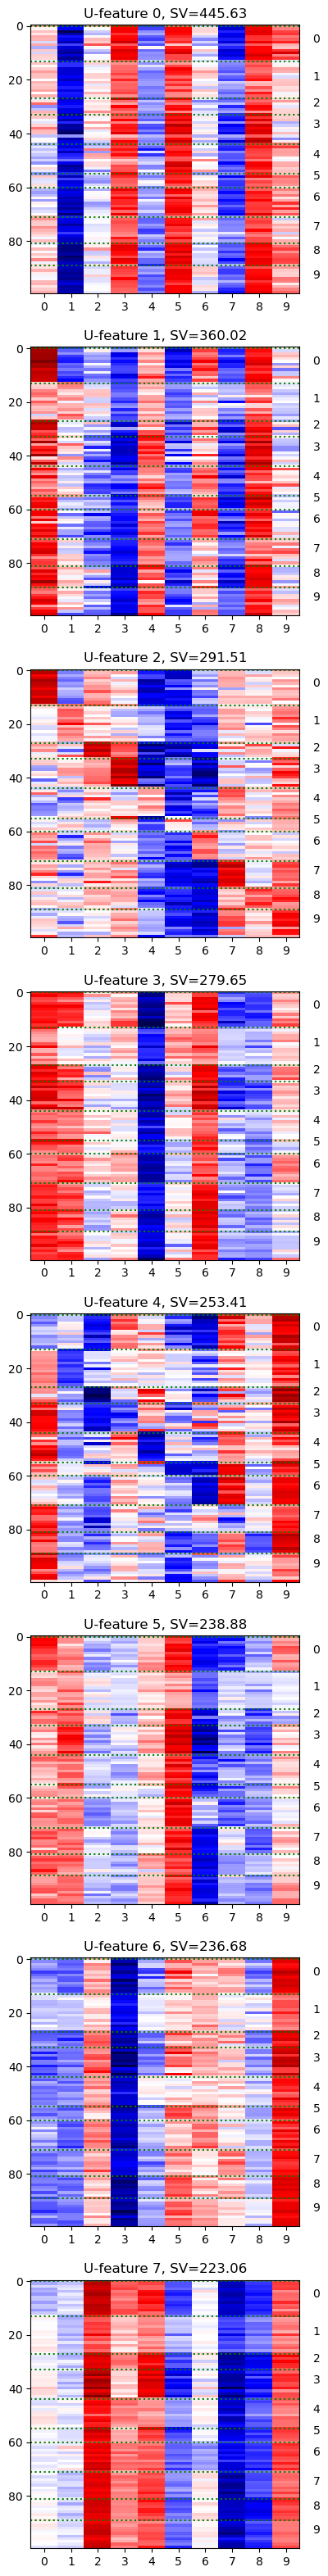

In [91]:
plot_top_2d_u_feats(models_w_bias[0], batch, y, max_feats=8, figsize=(20, 40))

## Stats stuff

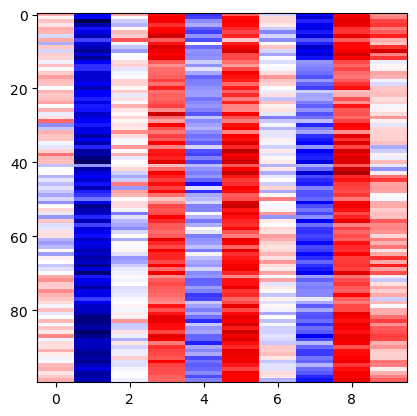

In [119]:
plt.imshow(
    canonical_2d_ufeats(models_w_bias[0], batch, y)[0].detach().cpu().numpy(),
    cmap="seismic",
    norm=colors.CenteredNorm(vcenter=0.0),
    aspect=0.1)

In [58]:
def variance_of_column_means(models, batch):
    u_features = [
        for model in models
    ]
    u_feature_column_means = [
        t.einsum("rnc -> rc", u_feature) / u_feature.shape[1]
        for u_feature in u_features
    ]
    variances_by_ufeat = [
        t.var(u_feature_column_mean, dim=0)
        for u_feature_column_mean in u_feature_column_means
    ]
    return variances_by_ufeat

In [59]:
variance_of_column_means([models_no_bias[0]], batch)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


[tensor([1.0010e-05, 1.0008e-05, 1.0000e-05, 9.9932e-06, 1.0007e-05, 9.9936e-06,
         1.0007e-05, 1.0010e-05, 1.0003e-05, 9.9839e-06])]

# MLP at initialization

In [78]:
from dots.models import *

In [79]:
mlp = MNIST_MLP(hidden=[512])

In [84]:
batch = range_batch(
    -t.ones([28, 28]),
    t.ones([28, 28]),
    n = 100
)

In [90]:
batch.shape

torch.Size([100, 28, 28])

In [91]:
y = t.zeros(batch.shape[0]).long()

In [92]:
mlp(batch).shape

torch.Size([100, 10])

In [93]:
for i in range(0, 4):
    plot_2d_classification_u_feats(mlp, batch, y, which_feat=i)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


: 

: 